In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')
# import sys
# sys.path.append('/content/drive/MyDrive/ML')

In [16]:
!rm -r ml-proj1
!git clone https://github.com/Pin-Yen/ml-proj1


Cloning into 'ml-proj1'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 2), reused 10 (delta 2), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [11]:
import sys
sys.path.append('/content/ml-proj1')

## Load the training data into feature matrix, class labels, and event ids:

In [29]:
from proj1_helpers import *
DATA_TRAIN_PATH = '/content/ml-proj1/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
print(y.shape, tX.shape, ids.shape)

# standardize 
tX = (tX - np.mean(tX, axis=0)) / np.std(tX, axis=0)

# split into training set (80%) & validation set (20%)
tX_train, tX_val, y_train, y_val = split_data(tX, y, ratio=0.8)
# y_val, tX_val, ids_val = y[200000:], tX[200000:], ids[200000:]
# y_train, tX_train, ids_train = y[:200000], tX[:200000], ids[:200000]



(250000,) (250000, 30) (250000,)


## Stochastic gradient descent with MSE

In [30]:
from sgd import *

w = np.zeros(tX.shape[1])
losses, accurarcies, ws = [], [], []

for i in range(5):
  losses_epoch, ws_epoch = stochastic_gradient_descent(y_train, tX_train, w, 256, 781, 0.05)
  losses += losses_epoch
  ws += ws_epoch
  w = ws[-1]


### Plot training loss

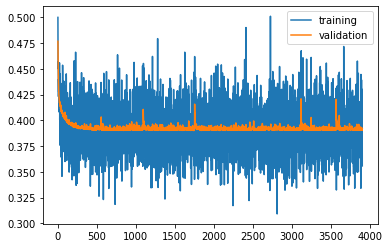

In [33]:
import matplotlib.pyplot as plt
from costs import compute_mse

plt.plot(range(len(losses)), losses, label='training')

losses_val = [compute_mse(y_val, tX_val, w) for w in ws]
plt.plot(range(len(losses_val)), losses_val, label='validation')

plt.legend()
plt.show()

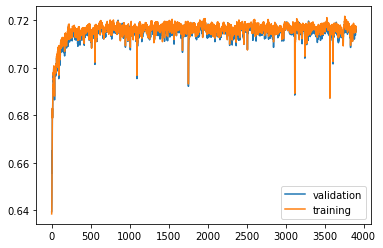

In [35]:
def accurarcy(y, y_pred):
    return (y == y_pred).mean()



accurarcies_val = [accurarcy(y_val, predict_labels(w, tX_val)) for w in ws]
plt.plot(range(len(ws)), accurarcies_val, label='validation')
accurarcies_train = [accurarcy(y_train, predict_labels(w, tX_train)) for w in ws]
plt.plot(range(len(ws)), accurarcies_train, label='training')

plt.legend()
plt.show()


## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = '' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)